In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sp
from scipy.stats import multivariate_normal
from scipy.stats import norm
from numpy import random as rd
from scipy import stats

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [99]:
def p(x):
    v = 10.0
    return 0.3 * norm.pdf(x, -20, v) + 0.7 * norm.pdf(x, 20, v)
    
def q_draw(z, v):
    return rd.normal(z, np.sqrt(v))

def q_pdf(z, zc, v):
    return norm.pdf(z, zc, np.sqrt(v))

def A(z, zt, v):
    num = p(z) * q_pdf(zt, z, v)
    den = p(zt) * q_pdf(z, zt, v)
    return min(1, num / den)
    
def mcmc(v, it):
    zt = 0
    data = np.zeros(it)
    ans = 0
    for i in range(it):
        zs = q_draw(zt, v)
        u = rd.uniform()
        if (u <= A(zs, zt, v)):
            ans += 1
            zt = zs
        data[i] = zt
    return data, ans


0.9127
[ 10.87516686  10.53107019  13.78182542  13.44410544  12.53839553
  15.17411306  11.84052509  10.82863312  11.9896432   11.95994251]


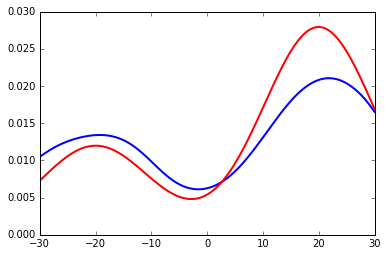

In [114]:
def sim(v, it):
    data, ans = mcmc(v, it)
    print (ans / it)
    print (data[-10:])

    kernel = stats.gaussian_kde(data)
    x = np.linspace(-30, 30, 300)
    plt.plot(x, kernel(x), label='MCMC', lw=2)
    plt.plot(x, p(x),'r', lw=2, label='real dist')
    plt.show()
    
sim(8, 10000)

0.9729
[-26.5343258  -26.28202384 -26.09966154 -28.27809933 -29.95311045
 -31.18933978 -30.44603799 -29.92062353 -29.20976435 -29.26047395]


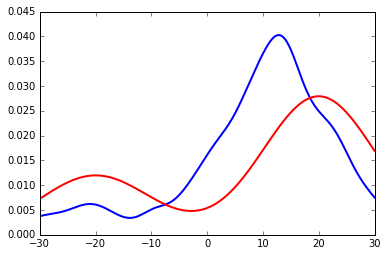

0.5761
[ 20.22140731  20.22140731  20.22140731  20.22140731  11.293705
 -18.34145365   9.79391535   9.79391535   9.79391535  18.26458855]


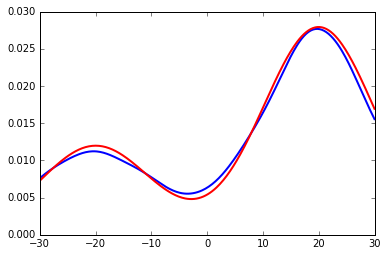

0.9221
[ 16.68292686  18.68501499  18.87789319  15.66351665  14.86306576
  12.76056716  12.54579449  13.70119118  14.14581366  18.95232257]


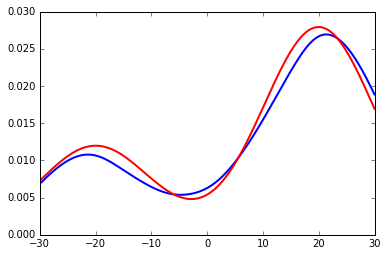

In [115]:
sim(1, 10000)
sim(500, 10000)
sim(8, 10000)

0.28399
[ 17.9117219   17.9117219   17.9117219   17.9117219   14.67224885
  14.67224885  14.67224885  14.67224885  14.67224885  14.67224885]


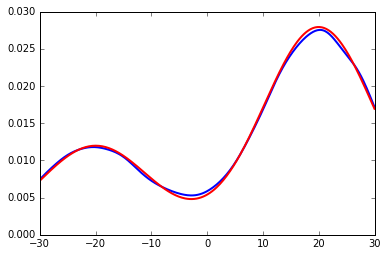

In [121]:
sim(5000, 100000)